In [2]:
import pandas as pd

df = pd.read_csv('PGA_LPGA_SALARIES_2003.csv')
df.head()

,Rank,Player,Winnings,Year,League,Tiger,League_Tiger
0,1,Vijay Singh,7573907,2003,1,1,1
1,2,Tiger Woods,6673413,2003,1,1,1
2,3,Davis Love III,6081896,2003,1,1,1
3,4,Jim Furyk,5182865,2003,1,1,1
4,5,Mike Weir,4918910,2003,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          8216 non-null   int64 
 1   Player        8216 non-null   object
 2   Winnings      8216 non-null   int64 
 3   Year          8216 non-null   int64 
 4   League        8216 non-null   int64 
 5   Tiger         8216 non-null   int64 
 6   League_Tiger  8216 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 449.4+ KB


In [5]:
df.describe()

,Rank,Winnings,Year,League,Tiger,League_Tiger
count,8216.000000,8.216000e+03,8216.000000,8216.000000,8216.000000,8216.000000
mean,136.604552,2.248035e+05,1995.371592,0.610029,0.493549,0.294547
std,86.957163,4.521527e+05,4.488635,0.487773,0.499989,0.455867
min,1.000000,1.530000e+02,1988.000000,0.000000,0.000000,0.000000
25%,65.000000,1.361275e+04,1992.000000,0.000000,0.000000,0.000000
50%,129.000000,7.045850e+04,1995.000000,1.000000,0.000000,0.000000
75%,193.000000,2.351898e+05,1999.000000,1.000000,1.000000,1.000000
max,372.000000,9.188321e+06,2003.000000,1.000000,1.000000,1.000000


In [16]:
import statsmodels.formula.api as smf
reg = smf.ols('Winnings ~ League + Tiger + League_Tiger', data=df).fit()

coefficients = reg.params

equation = f'Winnings = {coefficients["Intercept"]:.3f} + ' \
           f'{coefficients["League"]:.3f} * League + ' \
           f'{coefficients["Tiger"]:.3f} * Tiger + ' \
           f'{coefficients["League_Tiger"]:.3f} * League_Tiger + ' \

print(reg.summary())
print(equation)

                            OLS Regression Results                            
Dep. Variable:               Winnings   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     343.3
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          5.00e-210
Time:                        02:45:10   Log-Likelihood:            -1.1816e+05
No. Observations:                8216   AIC:                         2.363e+05
Df Residuals:                    8212   BIC:                         2.364e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.477e+04   1.08e+04      6.947   

In [19]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
 
%matplotlib inline

In [20]:
dates = [date(1996, 1, 1), date(1997, 1, 1), date(1998, 1, 1), date(1999, 1, 1), date(2000, 1, 1), date(2001, 1, 1), date(2002, 1, 1), date(2003, 1, 1), date(2008, 1, 1), date(2019, 1, 1)]
min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)
 
labels = ['Tiger Woods turns professional, marking the beginning of his illustrious career', 'A groundbreaking year for Woods as he wins the first Masters Championship, setting records as the youngest to win, achieving the highest margin of victory, and recording the best score. He is also declared PGAs Player of the Year.',
          'Woods secures a Grand Slam victory, showcasing his dominance in major championships', 'Continues his success by winning the Opens Championship for the first time', 'Achieves a historic feat by winning the U.S. Open, PGA Championship, U.S. Open, and British Open in the same year, setting the highest margin of victory in any major championship',
          'Becomes the only player to hold all four professional majors simultaneously, completing the "Tiger Slam', 'Continues to be a dominant force in golf, maintaining a strong presence in major tournaments', 'Woods remains a prominent figure in golf, competing at a high level.',
         'Wins the U.S. Open for his 14th Major Championship but faces challenges with a torn ACL, leading to a 10-month hiatus', 'Overcomes adversity, including a car crash, and makes a triumphant return by winning the Masters, capturing his 15th Major Championship']
# labels with associated dates
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]

In [21]:
label_offsets = np.zeros(len(dates))
label_offsets[::2] = 0.35
label_offsets[1::2] = -0.7
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)

In [25]:
stems = np.zeros(len(dates))
stems[::2] = 0.3
stems[1::2] = -0.3   
markerline, stemline, baseline = ax.stem(dates, stems)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

In [31]:
# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title('Important Milestones in Rock and Roll', fontweight="bold", fontfamily='serif', fontsize=16, 
                 color='royalblue')

plt.show()

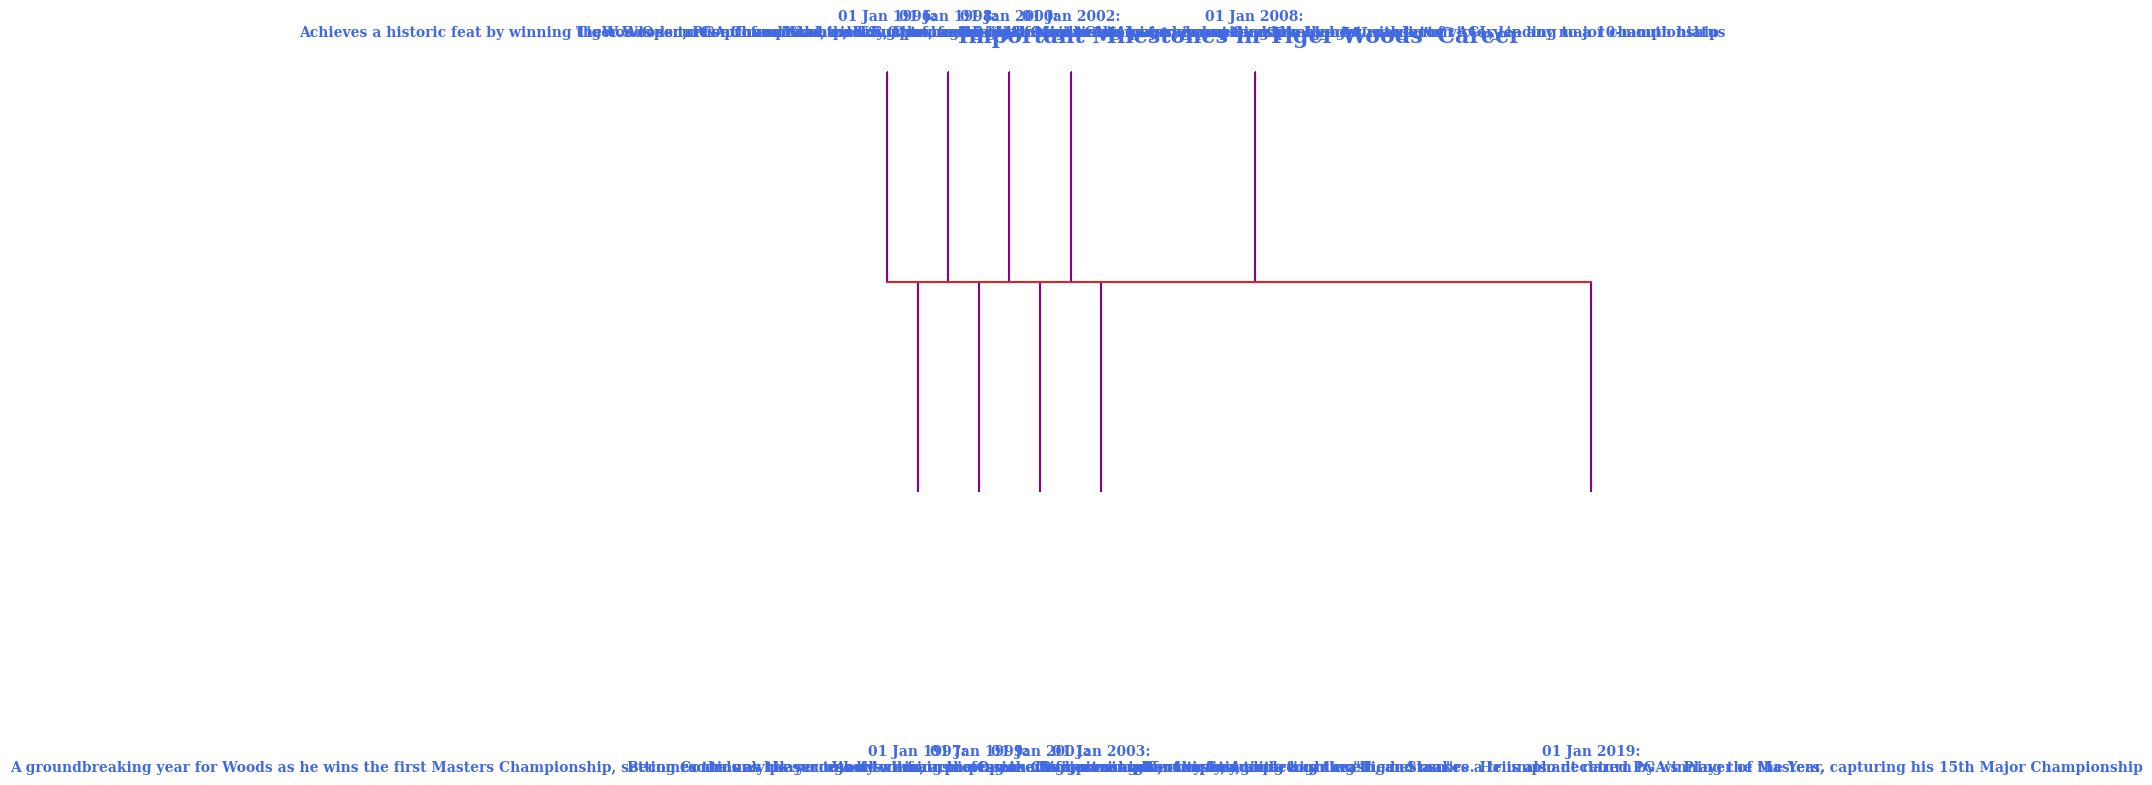

In [29]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

dates = [date(1996, 1, 1), date(1997, 1, 1), date(1998, 1, 1), date(1999, 1, 1), date(2000, 1, 1), date(2001, 1, 1),
         date(2002, 1, 1), date(2003, 1, 1), date(2008, 1, 1), date(2019, 1, 1)]

labels = ['Tiger Woods turns professional, marking the beginning of his illustrious career',
          'A groundbreaking year for Woods as he wins the first Masters Championship, setting records as the youngest to win, achieving the highest margin of victory, and recording the best score. He is also declared PGA\'s Player of the Year.',
          'Woods secures a Grand Slam victory, showcasing his dominance in major championships',
          'Continues his success by winning the Opens Championship for the first time',
          'Achieves a historic feat by winning the U.S. Open, PGA Championship, U.S. Open, and British Open in the same year, setting the highest margin of victory in any major championship',
          'Becomes the only player to hold all four professional majors simultaneously, completing the "Tiger Slam"',
          'Continues to be a dominant force in golf, maintaining a strong presence in major tournaments',
          'Woods remains a prominent figure in golf, competing at a high level.',
          'Wins the U.S. Open for his 14th Major Championship but faces challenges with a torn ACL, leading to a 10-month hiatus',
          'Overcomes adversity, including a car crash, and makes a triumphant return by winning the Masters, capturing his 15th Major Championship']

# labels with associated dates
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip(labels, dates)]

label_offsets = np.zeros(len(dates))
label_offsets[::2] = 0.35
label_offsets[1::2] = -0.7

for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue', fontsize=10)

stems = np.zeros(len(dates))
stems[::2] = 0.3
stems[1::2] = -0.3

markerline, stemline, baseline = ax.stem(dates, stems)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)

# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])

_ = ax.set_title('Important Milestones in Tiger Woods\' Career', fontweight="bold", fontfamily='serif', fontsize=16, color='royalblue')

plt.show()
